In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
tomatoes_reviews = pd.read_csv("outside_data/rotten_tomatoes_critic_reviews.csv")
tomatoes_movies = pd.read_csv("outside_data/rotten_tomatoes_movies.csv")

print("Reviews columns:\n", tomatoes_reviews.columns, "\n")
print("Movies columns:\n", tomatoes_movies.columns)

Reviews columns:
 Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object') 

Movies columns:
 Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')


## Reviews cleaning

In [274]:
tomatoes_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [275]:
tomatoes_reviews.isnull().sum()

rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

In [276]:
tomatoes_reviews.head(10)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
5,m/0814255,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."


We have some interesting data. Not all is relevant for our project so we can start by dropping some non useful columns.
We will drop `critic_name`, `top_critic`, `publisher_name` and `review_date`

We need the `rotten_tomatoes_link` to merge the movies df with the reviews we have have here

`review_type` is highly useful actually, because this basically translates to the relevance label that we need to predict later on, so good stuff to keep in mind. The review score, even though it has a big amount of missing data, can give us some kind of indication on what represents a "Fresh" review and a "Rotten" review. Based on the head of the df we can see that there are values out of 5 and even 4, but also letters that represent the "grade" given to the movie. 

In [277]:
tomatoes_reviews = tomatoes_reviews.drop(columns=["critic_name","top_critic", "publisher_name", "review_date"])
tomatoes_reviews

,rotten_tomatoes_link,review_type,review_score,review_content
0,m/0814255,Fresh,NaN,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Fresh,NaN,With a top-notch cast and dazzling special eff...
3,m/0814255,Fresh,3.5/5,Whether audiences will get behind The Lightnin...
4,m/0814255,Rotten,NaN,What's really lacking in The Lightning Thief i...
...,...,...,...,...
1130012,m/zulu_dawn,Rotten,2/5,NaN
1130013,m/zulu_dawn,Fresh,3.5/5,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Fresh,B+,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Rotten,3.5/5,"A simple two-act story: Prelude to war, and th..."


In [278]:
tomatoes_reviews["review_content"] = tomatoes_reviews["review_content"].astype(str).str.replace(r'\[|\]', '', regex=True)
tomatoes_reviews["review_content"] = tomatoes_reviews["review_content"].astype(str).str.replace("nan", "", regex=True)
tomatoes_reviews["review_content"]

0          A fantasy adventure that fuses Greek mythology...
1          Uma Thurman as Medusa, the gorgon with a coiff...
2          With a top-notch cast and dazzling special eff...
3          Whether audiences will get behind The Lightnin...
4          What's really lacking in The Lightning Thief i...
                                 ...                        
1130012                                                     
1130013    Seen today, it's not only a startling indictme...
1130014    A rousing visual spectacle that's a prequel of...
1130015    A simple two-act story: Prelude to war, and th...
1130016    Rides the line between being a pure artifact o...
Name: review_content, Length: 1130017, dtype: object

In [279]:
tomatoes_reviews["review_score"].value_counts()

review_score
3/5         90273
4/5         83659
3/4         72366
2/5         60174
2/4         47546
            ...  
9.66/10         1
9.99/10         1
5.751/10        1
3.515/10        1
3.85/10         1
Name: count, Length: 814, dtype: int64

I realised that some reviews have sometimes [] that may be confused with a list inside the list so I think I rather remove them, just in case, that way it will be more flowy and the sentiment analysis wont mistake it

Looks like sometimes people like to be funny when ranking movies from time to time and give it random scores like 9.66.
We dont necessarily need the score since we already have a "nullles" column `review_type` that gives us the relevance of the movie.

We can check if all the movies have a score and putthing them together to obtain an average score that can be later translated to the `label` / `review_type`. 

There are also some good amount of reviews missing, but we can check if these are from movies that already have reviews and concatenate them together, based on the amount of movies present on the movies df, this will probably be the case. 

Let's start with concatenating the reviews and data in general belonging to the same movies so that the merging with the movies df is easier. 
This will be easily achieved with groupby the `rotten_tomatoes_link` column, aggregating the rest of the columns and grouping them in lists for future information

In [280]:
grouped_tomatoes_df = tomatoes_reviews.groupby("rotten_tomatoes_link").agg(lambda x: x.tolist())
grouped_tomatoes_df.sample(15)

,review_type,review_score,review_content
rotten_tomatoes_link,,,
m/speed_1994,"[Fresh, Fresh, Rotten, Fresh, Rotten, Fresh, F...","[A, A, 5/10, 3/4, nan, nan, 3.5/4, 9/10, 3.5/4...","[The film takes off from formula elements, but..."
m/taking_woodstock,"[Rotten, Rotten, Rotten, Fresh, Fresh, Fresh, ...","[nan, nan, nan, 3/5, 3/5, nan, nan, nan, nan, ...",[Demetri Martin makes little impression as Tib...
m/dirty_shame,"[Fresh, Rotten, Fresh, Fresh, Fresh, Fresh, Fr...","[3/4, 1.5/5, 3.5/4, 2.5/4, 2.5/4, nan, nan, 1/...",[This NC-17 freak show could just as easily ha...
m/haxan,"[Fresh, Rotten, Fresh, Fresh, Fresh, Fresh, Fr...","[3.5/4, 2.5/4, 3.5/5, 3.5/5, 3.5/4, B, 4/5, A-...",[A truly unique work that still holds the powe...
m/mission_impossible_fallout,"[Fresh, Fresh, Fresh, Fresh, Fresh, Fresh, Fre...","[4/5, 8/10, A, A, nan, 5/5, nan, nan, nan, nan...",[Mission: Impossible - Fallout is going to blo...
m/1046151-fearless,"[Fresh, Fresh, Fresh, Fresh, Fresh, Fresh, Rot...","[B, 3.5/4, 3/4, 6/10, nan, 4/5, 5/10, nan, nan...","[, , ""Fearless"" is like a short story that shi..."
m/annabelle_comes_home,"[Fresh, Rotten, Rotten, Fresh, Fresh, Rotten, ...","[nan, nan, 2/5, 4/5, 2.5/4, 2/5, 1.5/5, 2.5/4,...","[Unlike previous films, where the human cast w..."
m/the_prince_2015,"[Rotten, Rotten, Rotten, Rotten, Rotten, Rotte...","[nan, 1/5, nan, nan, nan, 1.5/5, 1/5, D, nan, ...",[Macho mayhem as the male version of maternal ...
m/crazy_people,"[Rotten, Rotten, Rotten, Rotten, Rotten, Fresh...","[D-, 2/5, 2/4, 1/5, 2/5, 3/5, 3/5, nan, 2/4, 5...","[, , I wonder if they have a squad out in Holl..."


In [281]:
grouped_tomatoes_df['review_type'].str.len().value_counts()
print(grouped_tomatoes_df['review_type'].str.len().min())
print(grouped_tomatoes_df['review_type'].str.len().max())

1
992


In [282]:
grouped_tomatoes_df[grouped_tomatoes_df["review_type"].apply(lambda lst: isinstance(lst, list) and len(lst) == 1)]

#grouped_tomatoes_df[grouped_tomatoes_df["review_type"].apply(lambda lst: isinstance(lst, list) and len(lst) == 4)]


,review_type,review_score,review_content
rotten_tomatoes_link,,,
m/farewell_2010,[Fresh],[3/5],[]


Since the only column that only has one review has not review_content, might as well opt for the choice of dropping all the rows in the original df (without grouping) that contain any nan values. That way we still have a big amount of data with no no missing values.

In [283]:
tomatoes_reviews = tomatoes_reviews.dropna()
tomatoes_reviews

,rotten_tomatoes_link,review_type,review_score,review_content
3,m/0814255,Fresh,3.5/5,Whether audiences will get behind The Lightnin...
6,m/0814255,Rotten,1/4,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Fresh,3.5/5,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Fresh,B,"Fun, brisk and imaginative"
9,m/0814255,Fresh,3/5,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...
1130012,m/zulu_dawn,Rotten,2/5,
1130013,m/zulu_dawn,Fresh,3.5/5,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Fresh,B+,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Rotten,3.5/5,"A simple two-act story: Prelude to war, and th..."


In [284]:
df_reviews = tomatoes_reviews.groupby("rotten_tomatoes_link").agg(lambda x: x.tolist())
df_reviews.sample(15)

,review_type,review_score,review_content
rotten_tomatoes_link,,,
m/art_isthe_permanent_revolution,"[Fresh, Fresh, Fresh]","[3/4, 4/5, 3/5]",[The premise of this brief portrait sketch is ...
m/playing_mona_lisa,"[Rotten, Fresh, Fresh, Fresh, Fresh, Rotten, F...","[1.5/4, 3/4, 1/4, 3/5, 3/5, 1.5/5, 3/4, 1/5, 3...","[Devoid of almost any comedic energy., , , , ,..."
m/dazed_and_confused,"[Fresh, Fresh, Fresh, Fresh, Rotten, Fresh, Fr...","[A, 7/10, 4.5/5, 3/4, 2/4, 2.5/4, 4.5/5, 5/5, ...","[Once every decade or so, a movie captures the..."
m/kung_pow,"[Rotten, Rotten, Rotten, Rotten, Fresh, Rotten...","[1.5/4, 1/5, 0.5/4, 0/4, 2.5/4, 2/4, 2/5, 1.5/...","[The dose is strong and funny, for the first 1..."
m/absolutely_anything,"[Fresh, Rotten, Rotten, Rotten, Rotten, Rotten...","[3/5, 2/5, 1/5, 2/5, 2/5, 2/5, 0/5, 1/5, 2/5, ...",[It's all on Pegg and his goofy charisma to ke...
m/broken_embraces,"[Rotten, Fresh, Fresh, Fresh, Fresh, Fresh, Fr...","[2/5, 3/5, B+, 4/5, 4/5, 4/5, 4/5, 4/5, 3/5, 4...",[Feels like a mixed bag of smart ideas and nod...
m/the_space_between_us,"[Rotten, Fresh, Rotten, Fresh, Rotten, Rotten,...","[2/5, B, 2.5/5, B-, 4/10, C+, 1.5/4, 3/5, D, 1...",[Call it The Unspectacular Now...We're suppose...
m/nightmare_man,"[Fresh, Fresh, Fresh, Rotten]","[4.5/5, 3/5, 2.5/4, 2/5]","[A solid, whirlwind of a horror movie, with mo..."
m/prince_of_tides,"[Rotten, Rotten, Fresh, Fresh, Fresh, Fresh, R...","[C, C, 3.5/4, 3/5, 3.5/4, 3/5, 67/100, 67/100,...","[The Prince of Tides is a big, messy, go-for-t..."


In [285]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17676 entries, m/+_one_2019 to m/zulu_dawn
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_type     17676 non-null  object
 1   review_score    17676 non-null  object
 2   review_content  17676 non-null  object
dtypes: object(3)
memory usage: 552.4+ KB


Now we have all the reviews concatenated for each movie and their ratings, rotten or fresh (relevant/non-relevant)

We can count the amount of time the word `Rotten` or `Fresh` appears and make average it to find the overall rating. At the same time this is what we  already want to do with sentiment analysis, so it is a good oportunity to check its performance. 

In [286]:
df_reviews['review_type'].apply(lambda lst: lst.count("Fresh"))

rotten_tomatoes_link
m/+_one_2019                        40
m/+h                                 2
m/-_man                             18
m/-cule_valley_of_the_lost_ants      6
m/0814255                           58
                                  ... 
m/zoot_suit                          3
m/zootopia                         201
m/zorba_the_greek                    6
m/zulu                              16
m/zulu_dawn                          4
Name: review_type, Length: 17676, dtype: int64

In [287]:
def determine_dominant(lst):
    fresh_count = lst.count("Fresh")
    rotten_count = lst.count("Rotten")
    return "Fresh" if fresh_count > rotten_count else "Rotten"

try_out = df_reviews['review_type'].apply(determine_dominant)
try_out

rotten_tomatoes_link
m/+_one_2019                        Fresh
m/+h                               Rotten
m/-_man                             Fresh
m/-cule_valley_of_the_lost_ants     Fresh
m/0814255                          Rotten
                                    ...  
m/zoot_suit                         Fresh
m/zootopia                          Fresh
m/zorba_the_greek                   Fresh
m/zulu                              Fresh
m/zulu_dawn                        Rotten
Name: review_type, Length: 17676, dtype: object

In [288]:
df_reviews["review_label"] = try_out
df_reviews

,review_type,review_score,review_content,review_label
rotten_tomatoes_link,,,,
m/+_one_2019,"[Fresh, Fresh, Fresh, Fresh, Fresh, Rotten, Fr...","[3/4, B, 8/10, 4.5/5, B, 2/5, 4/5, B, 3/4, 4/5...",[This charming rom com goes to a lot of expect...,Fresh
m/+h,"[Fresh, Rotten, Rotten, Fresh, Rotten, Rotten]","[B+, 0.5/4, D, 8/10, 1/5, 1.5/4]",[Ultimately Plush exceeds its very limited exp...,Rotten
m/-_man,"[Fresh, Rotten, Fresh, Fresh, Rotten, Rotten, ...","[B, 2.5/4, 3/4, 3/4, 2.5/4, 1.5/5, 7/10, B, 3/...","[, Too many pieces of the puzzle are left out ...",Fresh
m/-cule_valley_of_the_lost_ants,"[Rotten, Fresh, Fresh, Fresh, Fresh, Fresh, Fr...","[1.5/5, 3/5, 4/5, 4/5, 3/5, 4/5, 8/10]",[Over the course of 90-odd minutes its charm w...,Fresh
m/0814255,"[Fresh, Rotten, Fresh, Fresh, Fresh, Fresh, Ro...","[3.5/5, 1/4, 3.5/5, B, 3/5, 4/5, 2/4, 2/5, 3/5...",[Whether audiences will get behind The Lightni...,Rotten
...,...,...,...,...
m/zoot_suit,"[Rotten, Fresh, Fresh, Fresh, Rotten]","[1/5, 3/5, B-, 3/5, 2/5]","[, , , A curious film with a hint of authentic...",Fresh
m/zootopia,"[Fresh, Fresh, Fresh, Fresh, Fresh, Fresh, Fre...","[4/5, 6/10, 4/5, 4/5, 9/10, 8.5/10, 3.5/5, 5/5...",[The be-true-to-yourself and don't-judge-other...,Fresh
m/zorba_the_greek,"[Fresh, Fresh, Rotten, Fresh, Fresh, Fresh, Fr...","[4/5, 4/5, C+, B, 4/5, 3/4, 79/100]","[, , Gained international acclaim for Anthony ...",Fresh


## Movies cleaning

In [289]:
tomatoes_movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [290]:
tomatoes_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [291]:
tomatoes_movies["rotten_tomatoes_link"].unique()

array(['m/0814255', 'm/0878835', 'm/10', ..., 'm/zorba_the_greek',
       'm/zulu', 'm/zulu_dawn'], shape=(17712,), dtype=object)

In [292]:
tomatoes_movies.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [293]:
tomatoes_movies

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


Starting with dropping unnecessary columns, we can easily say that we can drop:
- `directors`
- `authors`
- `actors`
- `streaming_release_date` (rather have the original release date)
- `runtime`
- `tomatometer_count`
- `audience_count`
- `tomatometer_top_critics_count`	
- `tomatometer_fresh_critics_count`	
- `tomatometer_rotten_critics_count`

I'm doubting whether we want the `movie_info` column to still be there since we don't necessarily want to know about the plot of the movie but about what people think about the movie, aka the reviews. I will drop it for now.

The column `original_release_date` has year-month-day structure, which is not the most useful so we can just get rid of the month and day and just keep the year for easier manipulation when it comes to merging with the reviews df.

In [294]:
tomatoes_movies = tomatoes_movies.drop(columns=[
    "directors", 
    "authors", 
    "actors", 
    "streaming_release_date", 
    "runtime", 
    "tomatometer_count", 
    "audience_count",
    "tomatometer_top_critics_count",
    "tomatometer_fresh_critics_count",
    "tomatometer_rotten_critics_count",
    "movie_info"
    ])

tomatoes_movies

,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,original_release_date,production_company,tomatometer_status,tomatometer_rating,audience_status,audience_rating
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,20th Century Fox,Rotten,49.0,Spilled,53.0
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,R,Comedy,2010-04-30,Sony Pictures Classics,Certified-Fresh,87.0,Upright,64.0
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",1979-10-05,Waner Bros.,Fresh,67.0,Spilled,53.0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",1957-04-13,Criterion Collection,Certified-Fresh,100.0,Upright,97.0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,Disney,Fresh,89.0,Upright,74.0
...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,NaN,R,"Drama, Musical & Performing Arts",1981-10-02,MCA Universal Home Video,Rotten,56.0,Upright,74.0
17708,m/zootopia,Zootopia,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy",2016-03-04,Walt Disney Animation Studios,Certified-Fresh,98.0,Upright,92.0
17709,m/zorba_the_greek,Zorba the Greek,NaN,NR,"Action & Adventure, Art House & International,...",1964-12-17,Fox,Fresh,80.0,Upright,86.0
17710,m/zulu,Zulu,Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama",1964-06-17,Paramount Pictures,Fresh,96.0,Upright,91.0


Changing the format of the `original_release_date` column.

In [295]:
tomatoes_movies["original_release_date"] = tomatoes_movies["original_release_date"].apply(
    lambda x: int(str(x)[:4]) if pd.notna(x) and str(x)[:4].isdigit() else None
).astype("Int64")

tomatoes_movies["original_release_date"]

0        2010
1        2010
2        1979
3        1957
4        1954
         ... 
17707    1981
17708    2016
17709    1964
17710    1964
17711    1979
Name: original_release_date, Length: 17712, dtype: Int64

Let's check the amount of missing reviews

In [296]:
tomatoes_movies["critics_consensus"].isnull().sum()

np.int64(8578)

We need to make sure that after merging and adding the `critics_consense` to the `reviews_content` we don't add the `NaN` values to the lists

## Time to merge

In [297]:
tomatoes_data = tomatoes_movies.merge(df_reviews, on="rotten_tomatoes_link")
tomatoes_data

,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,original_release_date,production_company,tomatometer_status,tomatometer_rating,audience_status,audience_rating,review_type,review_score,review_content,review_label
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010,20th Century Fox,Rotten,49.0,Spilled,53.0,"[Fresh, Rotten, Fresh, Fresh, Fresh, Fresh, Ro...","[3.5/5, 1/4, 3.5/5, B, 3/5, 4/5, 2/4, 2/5, 3/5...",[Whether audiences will get behind The Lightni...,Rotten
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,R,Comedy,2010,Sony Pictures Classics,Certified-Fresh,87.0,Upright,64.0,"[Fresh, Fresh, Fresh, Fresh, Fresh, Fresh, Rot...","[3/4, 3/5, 4/5, B+, 3/4, B+, 1/4, 5/5, 3/5, 4/...",[Holofcener always gives us more to chew on th...,Fresh
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",1979,Waner Bros.,Fresh,67.0,Spilled,53.0,"[Fresh, Fresh, Fresh, Rotten, Rotten, Rotten, ...","[4/5, 3/5, 3/5, 2/5, 2/5, 1/5, 4/5, 2/5, 1/5, ...",[Obvious but entertaining portrayal of midlife...,Fresh
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",1957,Criterion Collection,Certified-Fresh,100.0,Upright,97.0,"[Fresh, Fresh, Fresh, Fresh, Fresh, Fresh, Fre...","[4/4, 9/10, 92/100, 4/5, A-, 5/5, 5/5, 5/5, 5/...",[In a time of bloated when special effects hav...,Fresh
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",1954,Disney,Fresh,89.0,Upright,74.0,"[Fresh, Fresh, Fresh, Fresh, Rotten, Fresh, Fr...","[7/10, 4.5/5, 4/5, 4/5, 3/5, 7/10, 5/5, 5/5, 3...",[The embodiment of Disney at his best -- famil...,Fresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,m/zoot_suit,Zoot Suit,NaN,R,"Drama, Musical & Performing Arts",1981,MCA Universal Home Video,Rotten,56.0,Upright,74.0,"[Rotten, Fresh, Fresh, Fresh, Rotten]","[1/5, 3/5, B-, 3/5, 2/5]","[, , , A curious film with a hint of authentic...",Fresh
17666,m/zootopia,Zootopia,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy",2016,Walt Disney Animation Studios,Certified-Fresh,98.0,Upright,92.0,"[Fresh, Fresh, Fresh, Fresh, Fresh, Fresh, Fre...","[4/5, 6/10, 4/5, 4/5, 9/10, 8.5/10, 3.5/5, 5/5...",[The be-true-to-yourself and don't-judge-other...,Fresh
17667,m/zorba_the_greek,Zorba the Greek,NaN,NR,"Action & Adventure, Art House & International,...",1964,Fox,Fresh,80.0,Upright,86.0,"[Fresh, Fresh, Rotten, Fresh, Fresh, Fresh, Fr...","[4/5, 4/5, C+, B, 4/5, 3/4, 79/100]","[, , Gained international acclaim for Anthony ...",Fresh
17668,m/zulu,Zulu,Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama",1964,Paramount Pictures,Fresh,96.0,Upright,91.0,"[Fresh, Fresh, Fresh, Fresh, Fresh, Fresh, Fre...","[4/5, 5/5, A, 4/5, 4/5, 4/5, 4/5, 2.5/4, 3/5, ...","[, This amazing film is devastatingly accurate...",Fresh


In [298]:
tomatoes_data["review_content"].iloc[2]

['Obvious but entertaining portrayal of midlife crisis gone horribly awry.',
 '',
 '',
 'Highly over-rated Dudley Moore comedy.',
 '',
 "And oh, the irony, that the film only deserves a '1.'",
 '',
 'It was a big hit. I have never understood why.',
 'Sexist, juvenile, and pathetically structured, despite the gamest efforts of its actors and the blithe willingness of its famous non-actor.',
 'People tend to forget what a hilarious movie this really is',
 '',
 "Blake Edwards's 10 is perhaps the first comedy about terminal yearning. Like all great comedies, it deals with emotions very close to our hearts.",
 '',
 '',
 '',
 "This passable but not great Blake Edwards picture became known for the huge impact that the beautiful Bo Derek had on hairstyle; Bo's stardom was shortlived, though.",
 '',
 'Dudley Moore is periodically funny, Julie Andrews is mostly charming, and Bo Derek is always gorgeous.',
 "10's tossed-off quality keeps it from greatness, but it also distinguishes it from the gr

In [299]:
tomatoes_data.isnull().sum()

rotten_tomatoes_link        0
movie_title                 0
critics_consensus        8539
content_rating              0
genres                     19
original_release_date    1150
production_company        492
tomatometer_status         42
tomatometer_rating         42
audience_status           436
audience_rating           284
review_type                 0
review_score                0
review_content              0
review_label                0
dtype: int64

We need to make sure to only add the critics_consensus that are not `Null`

In [300]:
tomatoes_data["review_content"] = tomatoes_data.apply(
    lambda row: row["review_content"] + [row["critics_consensus"]] 
    if pd.notna(row["critics_consensus"]) else row["review_content"], axis=1
)

In [301]:
tomatoes_data = tomatoes_data.drop(columns="critics_consensus")

In [302]:
tomatoes_data.isnull().sum()

rotten_tomatoes_link        0
movie_title                 0
content_rating              0
genres                     19
original_release_date    1150
production_company        492
tomatometer_status         42
tomatometer_rating         42
audience_status           436
audience_rating           284
review_type                 0
review_score                0
review_content              0
review_label                0
dtype: int64

There are sadly a lot of missing values for the release date, but maybe we can even try to get the dates from the letterbox dataset.\\\
I think the date is kinda important when it comes to putting the movies together in case there are movies with the same name but different years.

Maybe when merging this with the letterbox data we will be able to find more years in common

I decided to keep the `tomatometer_status`, `tomatometer_rating`, `audience_status` and `audience_rating` since they can be also indicators on whether the movie is relevant or not for the future predictions.

We already have this in the `review_label` obtained from the `review_type` column but the `tomatometer_status` provides an additional label: "Certified-Fresh". Which may not be extremely important since we are doing a binary classification so we will change it for just "Fresh"

In [303]:
tomatoes_data["tomatometer_status"] = tomatoes_data["tomatometer_status"].replace("Certified-Fresh", "Fresh")
tomatoes_data["tomatometer_status"]

0        Rotten
1         Fresh
2         Fresh
3         Fresh
4         Fresh
          ...  
17665    Rotten
17666     Fresh
17667     Fresh
17668     Fresh
17669    Rotten
Name: tomatometer_status, Length: 17670, dtype: object

Now the thing is that the audience rating does not usually match the tomatometer rating, sometimes a Rotten movie will be classified as Upright and a Fresh movie will be classified as Spilled. Since this project is based on using the reviews and the data from the apps it might be better to just use the data from the tomatometer. In case the predictions don't have such high accuracy we can blame it on this. I will drop them for now, if in the future we want to retrain our model with just the audience ratings they will still be there

In [304]:
tomatoes_data = tomatoes_data.drop(columns=["audience_status", "audience_rating"])

In [305]:
tomatoes_data.columns

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'production_company', 'tomatometer_status',
       'tomatometer_rating', 'review_type', 'review_score', 'review_content',
       'review_label'],
      dtype='object')

In [306]:
tomatoes_data.to_csv("movie_reviews/clean_tomatoes_data.csv", index=False)

## Visualizations

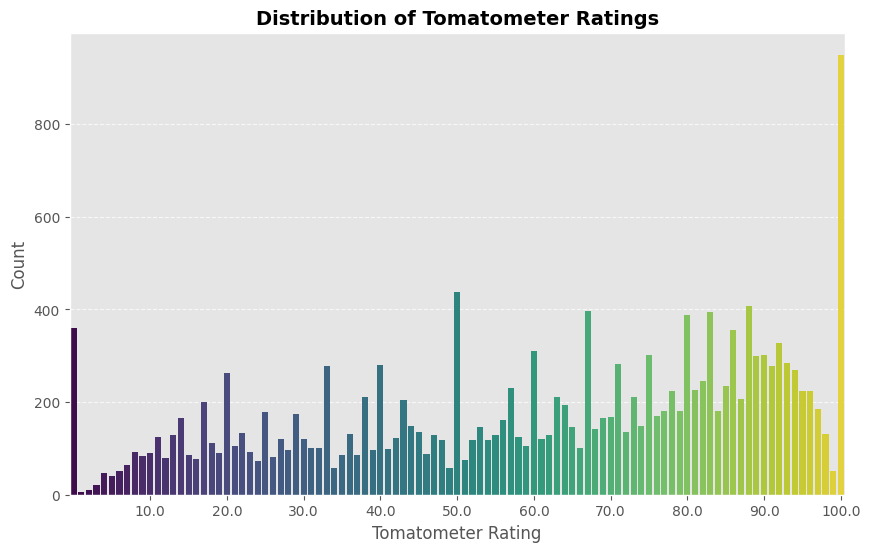

In [307]:
# plt.style.use("ggplot")

# # Distribution of tomatometer ratings
# plt.figure(figsize=(8, 5))
# sns.histplot(tomatoes_data['tomatometer_rating'].value_counts(), bins=10, kde=True, color='dodgerblue', edgecolor='black', alpha=0.7)
# plt.xlabel('Tomatometer Rating', fontsize=12, fontweight='bold')
# plt.ylabel('Count', fontsize=12, fontweight='bold')
# plt.title('Distribution of Tomatometer Ratings', fontsize=14, fontweight='bold')
# plt.show()

tomatometer_counts = tomatoes_data['tomatometer_rating'].value_counts()

plt.style.use("ggplot")

plt.figure(figsize=(10, 6))
sns.barplot(x=tomatometer_counts.index, y=tomatometer_counts.values, hue=tomatometer_counts.index, palette="viridis", legend=False)
plt.xlabel("Tomatometer Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Tomatometer Ratings", fontsize=14, fontweight='bold')
plt.xticks(ticks=range(10, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [308]:
tomatoes_data['content_rating'].value_counts()

content_rating
R        6371
NR       5442
PG-13    2977
PG       2167
G         675
NC17       38
Name: count, dtype: int64

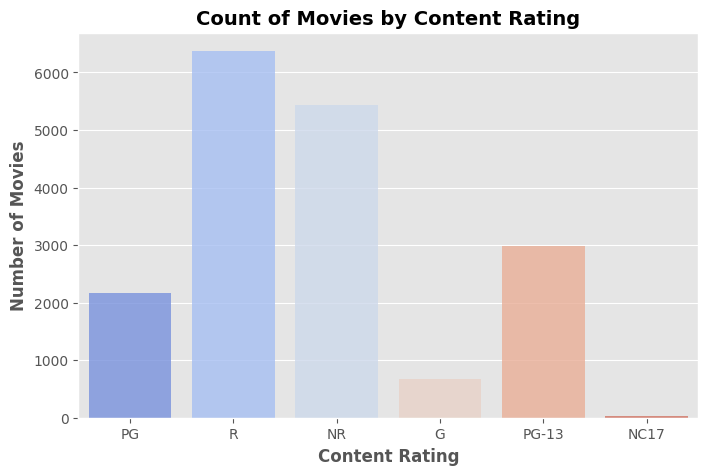

In [309]:
# movies by content rating
content_rating_count = tomatoes_data['content_rating'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(x=tomatoes_data['content_rating'], hue=tomatoes_data['content_rating'], palette='coolwarm', alpha=0.8, legend=False)
plt.xlabel('Content Rating', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Count of Movies by Content Rating', fontsize=14, fontweight='bold')
plt.show()

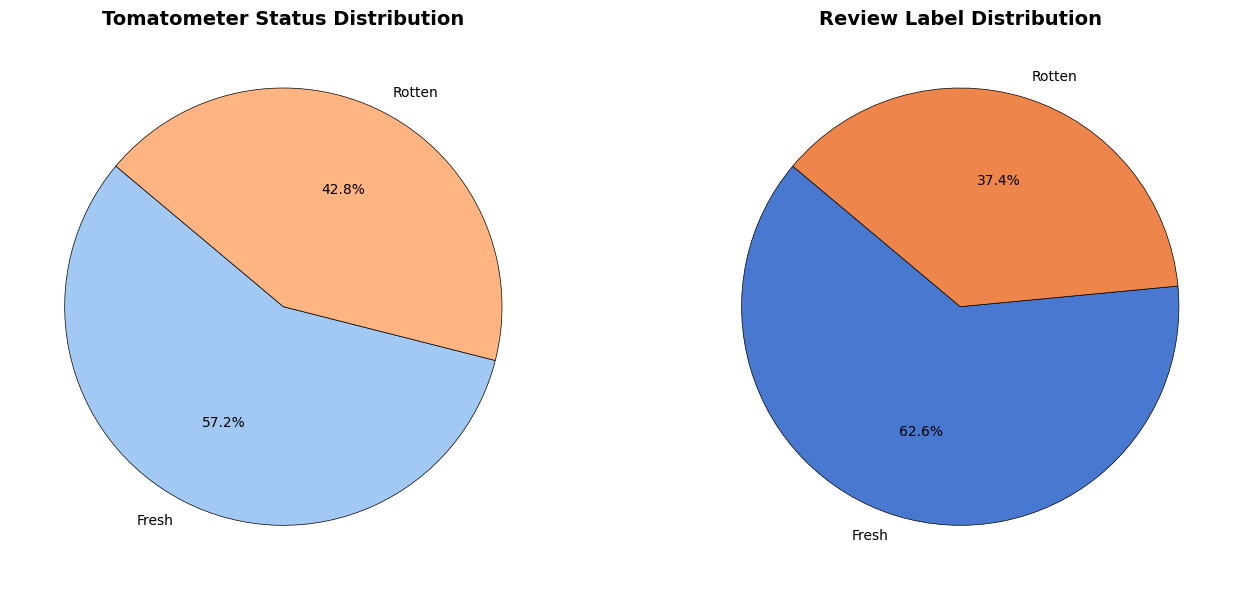

In [310]:
# Create a figure with two circular pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Tomatometer Status Pie Chart
tomatoes_data['tomatometer_status'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), 
    ax=axes[0], wedgeprops={'edgecolor': 'black'})
axes[0].set_ylabel('')  # Remove y-axis label
axes[0].set_title('Tomatometer Status Distribution', fontsize=14, fontweight='bold')

# Plot 2: Review Type Pie Chart
tomatoes_data['review_label'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"), 
    ax=axes[1], wedgeprops={'edgecolor': 'black'})
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].set_title('Review Label Distribution', fontsize=14, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Join Letterbox and Rotten Tomatoes data

In [313]:
df_tomatoes = pd.read_csv("movie_reviews/clean_tomatoes_data.csv")
df_letterbox = pd.read_csv("movie_reviews/clean_letterbox_data.csv")

In [312]:
df_tomatoes.columns

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'production_company', 'tomatometer_status',
       'tomatometer_rating', 'review_type', 'review_score', 'review_content',
       'review_label'],
      dtype='object')

In [314]:
movies_not_in_tomatoes = df_letterbox[~df_letterbox["movie_name"].isin(df_tomatoes["movie_title"])]

df_tomatoes_extended = pd.concat([df_tomatoes, movies_not_in_tomatoes], ignore_index=True)
df_tomatoes_extended

,rotten_tomatoes_link,movie_title,content_rating,genres,original_release_date,production_company,tomatometer_status,tomatometer_rating,review_type,review_score,review_content,review_label,movie_name,Release Year,Clean_Review,Like count,genre
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010.0,20th Century Fox,Rotten,49.0,"['Fresh', 'Rotten', 'Fresh', 'Fresh', 'Fresh',...","['3.5/5', '1/4', '3.5/5', 'B', '3/5', '4/5', '...","[""Whether audiences will get behind The Lightn...",Rotten,NaN,NaN,NaN,NaN,NaN
1,m/0878835,Please Give,R,Comedy,2010.0,Sony Pictures Classics,Fresh,87.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['3/4', '3/5', '4/5', 'B+', '3/4', 'B+', '1/4'...",['Holofcener always gives us more to chew on t...,Fresh,NaN,NaN,NaN,NaN,NaN
2,m/10,10,R,"Comedy, Romance",1979.0,Waner Bros.,Fresh,67.0,"['Fresh', 'Fresh', 'Fresh', 'Rotten', 'Rotten'...","['4/5', '3/5', '3/5', '2/5', '2/5', '1/5', '4/...",['Obvious but entertaining portrayal of midlif...,Fresh,NaN,NaN,NaN,NaN,NaN
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957.0,Criterion Collection,Fresh,100.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['4/4', '9/10', '92/100', '4/5', 'A-', '5/5', ...",['In a time of bloated when special effects ha...,Fresh,NaN,NaN,NaN,NaN,NaN
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954.0,Disney,Fresh,89.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Rotten',...","['7/10', '4.5/5', '4/5', '4/5', '3/5', '7/10',...",['The embodiment of Disney at his best -- fami...,Fresh,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Titane,2021.0,the most fucked up wholesome movie,2169.0,Drama
19091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harry Potter 20th Anniversary,2022.0,Laughed out loud when they said multi-million ...,2159.0,Documentary
19092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Love Hard,2021.0,so.....it's called Love Hard because of Love A...,2162.0,Comedy
19093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Serbian Film,2010.0,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",NaN,Horror


In [315]:
def merge_reviews_with_comma(row):
    """Merge Rotten Tomatoes' review_content with Letterboxd's Clean_Review, separating them by commas."""
    reviews = []
    if pd.notna(row["review_content"]):
        reviews.append(row["review_content"])
    if pd.notna(row["Clean_Review"]):
        reviews.append(row["Clean_Review"])
    return ", ".join(reviews) if reviews else None

# Apply function to merge reviews with commas
df_tomatoes_extended["review_content"] = df_tomatoes_extended.apply(merge_reviews_with_comma, axis=1)
df_tomatoes_extended

,rotten_tomatoes_link,movie_title,content_rating,genres,original_release_date,production_company,tomatometer_status,tomatometer_rating,review_type,review_score,review_content,review_label,movie_name,Release Year,Clean_Review,Like count,genre
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010.0,20th Century Fox,Rotten,49.0,"['Fresh', 'Rotten', 'Fresh', 'Fresh', 'Fresh',...","['3.5/5', '1/4', '3.5/5', 'B', '3/5', '4/5', '...","[""Whether audiences will get behind The Lightn...",Rotten,NaN,NaN,NaN,NaN,NaN
1,m/0878835,Please Give,R,Comedy,2010.0,Sony Pictures Classics,Fresh,87.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['3/4', '3/5', '4/5', 'B+', '3/4', 'B+', '1/4'...",['Holofcener always gives us more to chew on t...,Fresh,NaN,NaN,NaN,NaN,NaN
2,m/10,10,R,"Comedy, Romance",1979.0,Waner Bros.,Fresh,67.0,"['Fresh', 'Fresh', 'Fresh', 'Rotten', 'Rotten'...","['4/5', '3/5', '3/5', '2/5', '2/5', '1/5', '4/...",['Obvious but entertaining portrayal of midlif...,Fresh,NaN,NaN,NaN,NaN,NaN
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957.0,Criterion Collection,Fresh,100.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['4/4', '9/10', '92/100', '4/5', 'A-', '5/5', ...",['In a time of bloated when special effects ha...,Fresh,NaN,NaN,NaN,NaN,NaN
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954.0,Disney,Fresh,89.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Rotten',...","['7/10', '4.5/5', '4/5', '4/5', '3/5', '7/10',...",['The embodiment of Disney at his best -- fami...,Fresh,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the most fucked up wholesome movie,NaN,Titane,2021.0,the most fucked up wholesome movie,2169.0,Drama
19091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laughed out loud when they said multi-million ...,NaN,Harry Potter 20th Anniversary,2022.0,Laughed out loud when they said multi-million ...,2159.0,Documentary
19092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,so.....it's called Love Hard because of Love A...,NaN,Love Hard,2021.0,so.....it's called Love Hard because of Love A...,2162.0,Comedy
19093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",NaN,A Serbian Film,2010.0,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",NaN,Horror


In [316]:
df_tomatoes_extended["movie_title"] = df_tomatoes_extended["movie_title"].combine_first(df_tomatoes_extended["movie_name"])
df_tomatoes_extended["genre"] = df_tomatoes_extended["genre"].combine_first(df_tomatoes_extended["genres"])
df_tomatoes_extended["Release Year"] = df_tomatoes_extended["Release Year"].combine_first(df_tomatoes_extended["original_release_date"])

In [317]:
df_tomatoes_extended

,rotten_tomatoes_link,movie_title,content_rating,genres,original_release_date,production_company,tomatometer_status,tomatometer_rating,review_type,review_score,review_content,review_label,movie_name,Release Year,Clean_Review,Like count,genre
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010.0,20th Century Fox,Rotten,49.0,"['Fresh', 'Rotten', 'Fresh', 'Fresh', 'Fresh',...","['3.5/5', '1/4', '3.5/5', 'B', '3/5', '4/5', '...","[""Whether audiences will get behind The Lightn...",Rotten,NaN,2010.0,NaN,NaN,"Action & Adventure, Comedy, Drama, Science Fic..."
1,m/0878835,Please Give,R,Comedy,2010.0,Sony Pictures Classics,Fresh,87.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['3/4', '3/5', '4/5', 'B+', '3/4', 'B+', '1/4'...",['Holofcener always gives us more to chew on t...,Fresh,NaN,2010.0,NaN,NaN,Comedy
2,m/10,10,R,"Comedy, Romance",1979.0,Waner Bros.,Fresh,67.0,"['Fresh', 'Fresh', 'Fresh', 'Rotten', 'Rotten'...","['4/5', '3/5', '3/5', '2/5', '2/5', '1/5', '4/...",['Obvious but entertaining portrayal of midlif...,Fresh,NaN,1979.0,NaN,NaN,"Comedy, Romance"
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957.0,Criterion Collection,Fresh,100.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['4/4', '9/10', '92/100', '4/5', 'A-', '5/5', ...",['In a time of bloated when special effects ha...,Fresh,NaN,1957.0,NaN,NaN,"Classics, Drama"
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954.0,Disney,Fresh,89.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Rotten',...","['7/10', '4.5/5', '4/5', '4/5', '3/5', '7/10',...",['The embodiment of Disney at his best -- fami...,Fresh,NaN,1954.0,NaN,NaN,"Action & Adventure, Drama, Kids & Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,NaN,Titane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the most fucked up wholesome movie,NaN,Titane,2021.0,the most fucked up wholesome movie,2169.0,Drama
19091,NaN,Harry Potter 20th Anniversary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laughed out loud when they said multi-million ...,NaN,Harry Potter 20th Anniversary,2022.0,Laughed out loud when they said multi-million ...,2159.0,Documentary
19092,NaN,Love Hard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,so.....it's called Love Hard because of Love A...,NaN,Love Hard,2021.0,so.....it's called Love Hard because of Love A...,2162.0,Comedy
19093,NaN,A Serbian Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",NaN,A Serbian Film,2010.0,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",NaN,Horror


In [320]:
df_tomatoes_extended.drop(columns=["rotten_tomatoes_link", "movie_name", "genres", "original_release_date", "Clean_Review", "Like count", "content_rating", "production_company"], inplace=True, errors="ignore")
df_tomatoes_extended

,movie_title,tomatometer_status,tomatometer_rating,review_type,review_score,review_content,review_label,Release Year,genre
0,Percy Jackson & the Olympians: The Lightning T...,Rotten,49.0,"['Fresh', 'Rotten', 'Fresh', 'Fresh', 'Fresh',...","['3.5/5', '1/4', '3.5/5', 'B', '3/5', '4/5', '...","[""Whether audiences will get behind The Lightn...",Rotten,2010.0,"Action & Adventure, Comedy, Drama, Science Fic..."
1,Please Give,Fresh,87.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['3/4', '3/5', '4/5', 'B+', '3/4', 'B+', '1/4'...",['Holofcener always gives us more to chew on t...,Fresh,2010.0,Comedy
2,10,Fresh,67.0,"['Fresh', 'Fresh', 'Fresh', 'Rotten', 'Rotten'...","['4/5', '3/5', '3/5', '2/5', '2/5', '1/5', '4/...",['Obvious but entertaining portrayal of midlif...,Fresh,1979.0,"Comedy, Romance"
3,12 Angry Men (Twelve Angry Men),Fresh,100.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', ...","['4/4', '9/10', '92/100', '4/5', 'A-', '5/5', ...",['In a time of bloated when special effects ha...,Fresh,1957.0,"Classics, Drama"
4,"20,000 Leagues Under The Sea",Fresh,89.0,"['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Rotten',...","['7/10', '4.5/5', '4/5', '4/5', '3/5', '7/10',...",['The embodiment of Disney at his best -- fami...,Fresh,1954.0,"Action & Adventure, Drama, Kids & Family"
...,...,...,...,...,...,...,...,...,...
19090,Titane,NaN,NaN,NaN,NaN,the most fucked up wholesome movie,NaN,2021.0,Drama
19091,Harry Potter 20th Anniversary,NaN,NaN,NaN,NaN,Laughed out loud when they said multi-million ...,NaN,2022.0,Documentary
19092,Love Hard,NaN,NaN,NaN,NaN,so.....it's called Love Hard because of Love A...,NaN,2021.0,Comedy
19093,A Serbian Film,NaN,NaN,NaN,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",NaN,2010.0,Horror


In [322]:
df_tomatoes_extended.to_csv("movie_reviews/final_movie_reviews.csv", index=False)